# Heuristic  and Greedy Search Algorithms

**_Author: Jessica Cervi_**

**Expected time = 2 hours**

**Total points = 80 points**

    
## Assignment Overview

In this assignment, we will look at some types of search algorithms. In the first part of the assignment, we will focus on a very popular uniform seach algorithm, the A-star (A*) algorithm. After reiterating the foundations and the theory behind this algorithm, we will solve a simple problem using the `Python` library `pathfinding`. Next, you will be asked to solve a problem using the A* algorithm by hand. We will work on the A* algorithm using the library `networkx`.

The second part of the assignment focuses on another type of algorithm, the Greedy Search algorithm. After re-iterating the basics of this algorithm, you will be asked to solve a simple problem from scratch. The second part of the assignment focuses on another type of algorithm, the Greedy Search algorithm. After reiterating the basics of this algorithm, you will be asked to solve a simple problem from scratch.


This assignment is designed to build your familiarity and comfort coding in Python while also helping you review key topics from each module. As you progress through the assignment, answers will get increasingly complex. It is important that you adopt a data scientist's mindset when completing this assignment. **Remember to run your code from each cell before submitting your assignment.** Running your code beforehand will notify you of errors and give you a chance to fix your errors before submitting. You should view your Vocareum submission as if you are delivering a final project to your manager or client. 

***Vocareum Tips***
- Do not add arguments or options to functions unless you are specifically asked to. This will cause an error in Vocareum.
- Do not use a library unless you are explicitly asked to in the question. 
- You can download the Grading Report after submitting the assignment. This will include feedback and hints on incorrect questions. 


### Learning Objectives

- Use search algorithms such as A* search and A* optimality
- Learn how to implement the A* algorithm using the `pathfinding` and `networkx` library
- Compute the shortest path using the A* algorithm by hand
- Learn the basics of greedy algorithms and implement various problems in Python


## Index: 

####  Heuristic  and Greedy Search Algorithms
- [Question 1](#q01)
- [Question 2](#q02)
- [Question 3](#q03)
- [Question 4](#q04)
- [Question 5](#q05)
- [Question 6](#q06)
- [Question 7](#q07)
- [Question 8](#q08)
- [Question 9](#q09)

## Heuristic  and Greedy Search Algorithms


### Informed Search Algorithms

Informed search algorithms have information on the goal state, which helps in more efficient searching. This information is obtained by something called a **heuristic**.

In an informed search, a heuristic is a function that estimates how close a state is to the goal state. Some examples are Manhattan distance, Euclidean distance, etc.
Of course, different heuristics are used in different informed algorithms.

**A-star** (also referred to as A*) is one of the most successful search algorithms to find the shortest path between nodes or graphs. It is an informed search algorithm, as it uses information about path cost and also uses heuristics to find the solution.

In the first part of this assignment, we will focus on learning  how to implement an A* algorithm using the library [`pathfinder`](https://pypi.org/project/pathfinder/). In the second part of the assignment, we will focus on how to build A* search algorithm from scratch using a simple Python code. Finally, we will conclude the section about Informed Search Algorithms by utilizing the library `networkx` and its implemetation of the A* algorithm.

###### The theory behind the A* algorithm

A* achieve **optimality** and **completeness**, two valuable properties of search algorithms.

When a search algorithm has the property of optimality, it means it is guaranteed to find the best possible solution. When a search algorithm has the property of completeness, it means that if a solution to a given problem exists, the algorithm is guaranteed to find it.

Now to understand how A* works, first we need to understand a few terminologies:

- **Node** (also called State) — All potential positions or stops with a unique identification
- **Transition** — The act of moving between states or nodes
- **Starting Node** — Where to start searching
- **Goal Node** — The target to stop searching
- **Search Space** — A collection of nodes, like all board positions of a board game
- **Cost** — Numerical value (say distance, time, or financial expense) for the path from a node to another node
- **g(n)** — The exact cost of the path from the starting node to any node n
- **h(n)** — The heuristic estimated cost from node n to the goal node
- **f(n)** — Lowest cost in the neighboring node n

Each time A* enters a node, it calculates the cost, f(n)(n being the neighboring node), to travel to all of the neighboring nodes, and then enters the node with the lowest value of f(n).
We calculate these values using the following formula:

$$f(n) = g(n) + h(n)$$

We begin by importing the necesserary modules and function from the library `pathfinding`:

In [2]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder

The first thing we need to define is the *maze* we want to work on.

In the simplest case, this can be defined in Python using a list of lists.

For example, assume that we wanted to find the shortest path from one point to another in this maze:

$$\begin{pmatrix}
1 &1\\
1 &0 
    \end{pmatrix}$$
then we would need to define our maze in Python in the following way:


In [3]:
my_maze = [[1,1], [1,0]]

#### Entries meaning

Any value smaller or equal to 0 describes an **obstacle**. Any number bigger than 0 describes the weight of a field that can be walked on. The bigger the number the higher the cost to walk that field.

In the next questions, we want the algorithm to create a path from the upper left to the bottom right. 

To make it not too easy for the algorithm, we added an obstacle in the middle, so that it cannot use the direct way. We ignore the weight for now, and all fields will have the same cost of 1.

[Back to top](#Index:) 
<a id='q01'></a>


### Question 1:

*5 points*
    
$$\begin{pmatrix}
1 &1& 1\\
1 &0& 1 \\
1 &1& 1\\
    \end{pmatrix}$$

From the image above, construct a list of lists with the entries of the matrix above. Assign the result to `ans_1`.


In [4]:
### GRADED

### YOUR SOLUTION HERE
ans_1 = [[1, 1, 1], [1, 0, 1], [1, 1, 1]]
###
### YOUR CODE HERE
###


In [5]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Next, we need to create a new grid from this map representation using the function `grid()` from `pathfinding` and by massing the name of our map to it. This will create node instances for every element of our map, and it will also set the size of the map. For now, we assume that your map is a square, so the size height is defined by the length of the outer list and the width by the length of the first list inside it.

In [6]:
grid = Grid(matrix=ans_1)

Next, we need to define the start and end points of our path.

In `Python`, the entries on a regular grid are numbered using a $(x,y)$-type numbering, where $x$ denotes the row number and $y$ denotes the columns.

Note that both $x$ and $y$ start at 0 and they follow a top-to-bottom and left-to-right order, respectively.

For example, if you wanted to define a point with coordinate (1,2) as a starting point, you would write:

In [7]:
my_start = grid.node(1,2)

[Back to top](#Index:) 
<a id='q02'></a>


### Question 2:

*5 points*
    
    
Our goal is to find the shortest path from the top-left corner to endpoint (bottom-right) from the map.
    
Define the start point as `start` and the end point as `end`.

In [8]:
### GRADED

### YOUR SOLUTION HERE
start = grid.node(0,0)
end = grid.node(2,2)

###
### YOUR CODE HERE
###


In [9]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Next, we need to create a new instance of our finder and let it do its work. 

This can done by invoking the function [`AStarFinder`](https://pub.dev/documentation/pathfinding/latest/pathfinding.finders.astar/AStarFinder-class.html).

Notice that by default this instance does not allow for diagonal movement in our search (only left, right, top, and bottom).

In the code cell below, we create a new instance for your path finder and assign it to the variable `finder`. Notice that we make sure to allow for diagonal movement and search by setting the argument `diagonal_movement` equal to `DiagonalMovement.always`

In [10]:
finder = AStarFinder(diagonal_movement=DiagonalMovement.always)


Finally, we can run our seach algorithm using the `find_path()` function on our instance. This function takes as arguments, the start and end point of our path as well as the grid we are searching *in this order*.

The `find_path()` function does not only return you the path from the start to the end point it also returns the number of times the algorithm needed to be called until a way was found.

Below, we find the shortest path, as well as the number of runs for our search.

In [11]:
path, runs = finder.find_path(start, end, grid)

Now we can print the result (or do something else with it). Note that the start and end points are part of the path.

Run the code cell below to visualize the results.

In [12]:
print('operations:', runs, 'path length:', len(path))
print(grid.grid_str(path=path, start=start, end=end))

operations: 5 path length: 4
+---+
|sx |
| #x|
|  e|
+---+


You can ignore the +, - and | characters, they just show the border around your map, the blank space is a free field, 's' marks the start, 'e' the end and '#' our obstacle in the middle. You see the path from start to end marked by 'x' characters. We allow horizontal movement, so it is not using the upper-right corner.



[Back to top](#Index:) 
<a id='q03'></a>


### Question 3:

*5 points*
    
You can access `print(path)` to get the specific list of coordinates.
What are the coordinates of the second point in our path? Assign your answer as a tuple to `ans3`.

In [13]:
### GRADED

### YOUR SOLUTION HERE
ans3 = (1,0)

###
### YOUR CODE HERE
###


In [14]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Computing the shortest path using the A* by hand

Before implementing the A* algorithm from scratch, let's make sure we covered all the basics with an exercise where we ask you to find the path from point S to point G on the graph below.

![](./assets/graph.png)

Remember that an A* search is optimal only when for all nodes, the forward cost for a node h(x) underestimates the actual cost h*(x) to reach the goal. 

This property of A* heuristic is called admissibility.
A strategy to reach this goal is to choose the node with lowest f(x) value.


In [17]:
finder_ = AStarFinder(diagonal_movement=DiagonalMovement.always)

For example, given the graph above the first two steps of our search can be performed in the following way:
    
|Step #| Path | H(x) | G(x) | F(x)|
|---| --- | --- | --- | ---|
|1 | S | 7 | 0 | 7|
|2|S-> A | 9|3|12|
|2|S->D|5|2|7|

In the second step, we see that moving from S to D is less costly than moving from S to A, therefore we choose that path.

[Back to top](#Index:) 
<a id='q04'></a>


### Question 4:

*10 points*
    
Complete the exercise above until you reach point G.
    
What is the optimal path? Assign your answer to `ans_6a` as a list containing the letters (in lowercase) in the path.

What is the cost of the path? Assign your answer as an integer to `ans_6b`.

In [24]:
### GRADED

### YOUR SOLUTION HERE
ans_6a = ['s', 'd','b', 'e', 'g']
ans_6b = 7

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


---
## Heuristic search with A* and the `networkx` library

`NetworkX` is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

The animated gif below demonstrates the efficiency when we have a heuristic function in place.  In essence, this helps us to keep our focus on the goal state of the traversal and can trim the amount of routes considered.

<center>
    <img src = 'assets/Astar_progress_animation.gif'/>
</center>


Examples of heuristic functions are *Euclidean distance* or *Manhattan distance* (defined later).  For instance, in our Romania map example from the lectures, we could use the straight-line geographic distance between points as the heuristic function.

We will move to implementing these algorithms in this section using the `networkx` library.  For us to implement the `a_star` above, this would involve additional information about the orientation of points in our simple graph or the introduction of a coordinate system to allow easy use of the metric.


<img src = 'assets/romania_map.png'>

In the code cell below, we have defined a dictonary of dictionaries that defines the map above.

Next, we use the function `from_dict_of_dicts()` to transform our dictonary of dictionaries into a network.

In [18]:
romania_map = {'Arad': {'Sibiu': {'weight':140}, 'Timisoara': {'weight':118}, 'Zerind': {'weight':75}},
 'Bucharest': {'Fagaras': {'weight':211}, 'Giurgiu': {'weight':90}, 'Pitesti': {'weight':101}, 'Urziceni': {'weight':85}},
 'Craiova': {'Drobeta': {'weight':120}, 'Pitesti': {'weight':138}, 'Rimnicu': {'weight':146}},
 'Drobeta': {'Mehadia': {'weight':75}},
 'Eforie': {'Hirsova': {'weight':86}},
 'Fagaras': {'Sibiu': {'weight':99}},
 'Hirsova': {'Urziceni': {'weight':98}},
 'Iasi': {'Neamt': {'weight':87}, 'Vaslui': {'weight':92}},
 'Lugoj': {'Mehadia': {'weight':70}, 'Timisoara': {'weight':111}},
 'Oradea': {'Sibiu': {'weight':151}, 'Zerind': {'weight':71}},
 'Pitesti': {'Rimnicu': {'weight':97}},
 'Rimnicu': {'Sibiu': {'weight':80}},
 'Urziceni': {'Vaslui': {'weight':142}}}

#importing the library
import networkx as nx
#suppress warnings
import warnings
warnings.filterwarnings('ignore')
#reading the dictonary into a network object
romania_graph = nx.from_dict_of_dicts(romania_map)

[Back to top](#Index:) 
<a id='q05'></a>


### Question 5:

*5 points*

We can use the `networkx` implementation of A* out of the box.
+ Apply [`nx.astar.astar_path`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.astar.astar_path.html) to find the shortest path from `Arad` to `Bucharest` in `romania_graph`. Assign the result to `ans_7_path`.
+ Apply [`nx.astar.astar_path_length`](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.astar.astar_path_length.html) to find the *length* of the shortest path from `Arad` to `Bucharest` in `romania_graph`. Assign the result to `ans_7_length`.

In [22]:
### GRADED

### YOUR ANSWER HERE
ans_7_path =  nx.astar.astar_path(romania_graph, 'Arad', 'Bucharest')
ans_7_length = nx.astar.astar_path_length(romania_graph, 'Arad', 'Bucharest')
# print(ans_7_path)
# ans_7_length
###
### YOUR CODE HERE
###


['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']


418

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Our Romania example could incorporate something like latitude and longitude coordinates into its representation and we could define a heuristic based on Pythagorean distances between these values.  Below, we demonstrate this with a simple example from the `networkx` documentation using a `grid_graph`, which positions nodes according to `(x,y)` tuples.  As such, we can define a distance function based on euclidean distance as shown below.

In [25]:
# Generate simple grid graph
G = nx.grid_graph(dim=[3,4])

Matplotlib is building the font cache; this may take a moment.


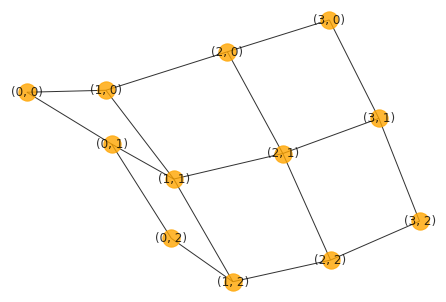

In [26]:
nx.draw(G, with_labels=True, node_color='orange', node_size=300, alpha = 0.8)

In [27]:
#Euclidean distance
def dist(a, b):
    (x1, y1) = a # Unpacks coordinates from tuple
    (x2, y2) = b # Unpacks coordinates from tuple
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
print(nx.astar_path(G,(0,0),(3,2), dist))

[(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (3, 2)]


[Back to top](#Index:) 
<a id='q06'></a>


### Question 6:

*5 points*

Your task here is to complete the function `manhattan_dist` below to be compatible with `nx.astar_path`.
+ You can use the function `dist` above as a template.
+ The inputs will be two tuples of length 2 (as in `dist`) equal to `a` and `b`.
+ In two dimensions, the [*Manhattan distance* ](https://en.wikipedia.org/wiki/Taxicab_geometry) can be defined as

$$ \mathtt{manhattan\_dist}(a,b) = |a_1-b_1| + |a_2-b_2|$$

+ Your function should return the Manhattan distance between `a` and `b`.

In [28]:
### GRADED

### YOUR SOLUTION
def manhattan_dist(a, b):
    '''
    This function takes in two tuples of the form (x,y)
    and computes the manhattan distance between the two.
    '''
    (x1, y1) = a # Unpacks coordinates from tuple
    (x2, y2) = b # Unpacks coordinates from tuple
    return abs(x1 - x2) + abs(y1 - y2)
print(nx.astar_path(G,(0,0),(3,2), manhattan_dist))
###
### YOUR CODE HERE
###


[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2)]


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Road network in Sioux Falls

In our next example, we have a road network from Sioux Falls, Iowa. You can find more data on transportation networks [here](https://github.com/bstabler/TransportationNetworks). 


The code below was adapted from the networkx tutorial [here](http://avinashu.com/tutorial/pythontutorialnew/NetworkXBasics.html).  

This is simply to demonstrate a path search algorithm using real data to determine a shortest path.

In [32]:
import warnings
warnings.filterwarnings('ignore')
# READ IN DATA ON NODES AND EDGES
G3 = nx.DiGraph() # a *directed* graph
with open("data/SiouxFalls_flow.txt", "r") as f:
    line = f.readline()
    line = f.readline()
    while len(line):
        l = line.split()
        fromnode = int(l[0])
        to = int(l[1])
        volume = float(l[2])
        cost = int(float(l[3]))
        G3.add_edge(fromnode, to, weight = cost)
        line = f.readline()

In [33]:
with open("data/SiouxFalls_node.txt", "r") as f:
    line = f.readline()
    line = f.readline()
    while len(line):
        line = line.strip(';')
        l = line.split()
        node = int(l[0])
        pos1 = float(l[1])/10000
        pos2 = float(l[2])/10000
        G3.add_node(node, pos=(pos1,pos2))
        line = f.readline()

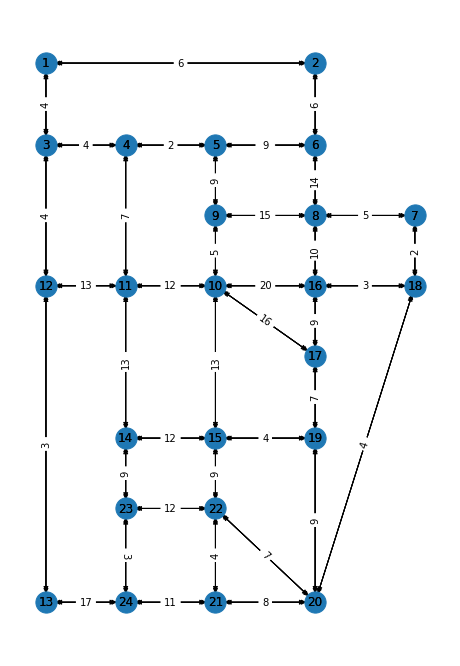

In [34]:
#import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


# CREATE PLOT OF NETWORK
plt.figure(figsize=(8,12))
# The positions of each node are stored in a dictionary
node_pos=nx.get_node_attributes(G3,'pos')
# The edge weights of each arcs are stored in a dictionary
arc_weight=nx.get_edge_attributes(G3,'weight')
# Determine the shortest path
sp = nx.dijkstra_path(G3,source = 1, target = 20)
# Create a list of arcs in the shortest path using the zip command and store it in red edges
red_edges = list(zip(sp,sp[1:]))
# Draw the nodes
nx.draw_networkx(G3, node_pos, node_size=450)
# Draw the node labels
nx.draw_networkx_labels(G3, node_pos)
# Draw the edges
nx.draw_networkx_edges(G3, node_pos)
# Draw the edge labels
nx.draw_networkx_edge_labels(G3, node_pos, edge_labels=arc_weight)
# Remove the axis
plt.axis('off');

[Back to top](#Index:) 
<a id='q07'></a>


### Question 7:

*5 points*

Your task here is to apply A* to the graph `G3` describing the Sioux Falls transportation nextwork data. 

You will provide a heuristic function `sioux_dist` that you will be completing below.

+ The function `sioux_dist` will accept two vertex labels `a` and `b` from the `Graph` object `G3` as input.
+ Individual vertices can be indexed from `G3.nodes` with an appropriate label. For each vertex `a`, you can access a dict `G3.nodes[a]` with a single key `pos` whose value is a 2-tuple with the Cartesian coordinates of the node.
+ Your function should return the distance computed will be the usual Euclidean distance between two points $a=(a_1,a_2)$ and $b=(b_1,b_2)$, i.e.,
  $$ \sqrt{\left(a_1-b_1\right)^2 + \left(a_2-b_2\right)^2} .$$

In [36]:
import numpy as np

In [43]:
### GRADED

### YOUR SOLUTION HERE
def sioux_dist(a, b):
    '''
    Compute the euclidean distance between nodes a & b in graph G3
    '''
    (x1, y1) = G3.nodes[a]['pos'] # Unpacks coordinates from tuple
    (x2, y2) = G3.nodes[b]['pos'] # Unpacks coordinates from tuple
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
###
### YOUR CODE HERE
###
print('Using sioux_dist, A* determines the path\n{}\nfrom node 3 to node 19.'
       .format(nx.astar_path(G3, 3, 19, sioux_dist)))

Using sioux_dist, A* determines the path
[3, 4, 5, 9, 10, 15, 19]
from node 3 to node 19.


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Greedy Search Algorithms

Greedy algorithms aim to make the optimal choice at that given moment. At each step, it chooses the optimal choice without knowing the future. It attempts to find a globally optimal way to solve the entire problem using this method.

We call algorithms greedy when they utilize the greedy property. The greedy property is:

**At that exact moment in time, what is the optimal choice to make?**

 They do not look into the future to decide the global optimal solution. They are only concerned with the optimal solution locally. For this reason, greedy algorithms are fast. This means that the overall optimal solution may differ from the solution the algorithm chooses.


### Greedy Algorithm to find minimum number of coins

We are given a value V in US dollars. If we want to make a change for V, what is the minimum number of coins and/or notes needed to make the change?

Assume that we have an infinite supply of each of the denominations of the American currency, i.e. we have an infinite supply of { 1, 2, 5, 10, 20, 50, 100} valued bills (no coins).


**EXAMPLES**
```Python

Input: V = 70
Output: 2
We need a $50 bill and a $20 bill.

Input: V = 121
Output: 3
We need a $100 bill, a $20 bill and a $1 bill. 
```

To solve this problem, a common intuition would be to take coins with a greater value first. This can reduce the total number of coins needed. Starting from the largest possible denomination, we keep adding denominations while the remaining value is greater than 0.

The pseudocode for the greedy algorithm follows the steps below:

- 1) Sort the array of bills in decreasing order.
- 2) Initialize the result as empty.
- 3) Find the largest denomination that is smaller than the current amount.
- 4) Add denomination found to the result and subtract the value of denomination found from the amount.
- 5) If the amount becomes 0, then print the result.
- 6) Else repeat the steps 3 and 4 for a new value of V.

[Back to top](#Index:) 
<a id='q08'></a>


### Question 8:

*20 points*
    
    
Define a function, `make_change` that takes one argument `V` corresponding to the total amount of dollars you want to make change for.

Your function should:

- Define all denominations of the American currency in a list, `deno` as described above
- Find the lenght of `deno` and assign it to a variable `n`
- Initialize an empty list, `change`, that will contain the change given for the amount V
- Using a `while` loop, traverse through all denominations, starting from the biggest one possible and appending the result inside the list `change`. Don't forget to substract the denominations progressively used from the amount V

Your function should return the list `change`.

In [57]:
### GRADED

### YOUR SOLUTION HERE
  
def make_change(V):
    deno = [100, 50, 20, 10, 5, 2, 1]
    n = len(deno)
    C_change = [0] *n
    change = []
    print ("Currency Count -> ")  
    for i, j in zip(deno, C_change):
        if V >= i:
            j = V // i
            V = V - j * i
            apple = (j)
            change.append(apple)
    return change
###
### YOUR CODE HERE
###

#Testing your function
V = 93
print("Minimal number of change for", V, ": ") 
change = make_change(V)
#print(change)
# Print result 
for i in range(len(change)): 
        print(change[i]) 

Minimal number of change for 93 : 
Currency Count -> 
1
2
1
1


In [20]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Greedy Algorithm for Egyptian Fraction


Every positive fraction can be represented as a sum of unique unit fractions. A fraction is a unit fraction if the numerator is 1 and denominator is a positive integer, for example 1/3 is a unit fraction. Such a representation is called an Egyptian Fraction as it was used by ancient Egyptians.

Some examples of decomposition into Egyptian fractions are:
```
Egyptian Fraction Representation of 2/3 is 1/2 + 1/6
Egyptian Fraction Representation of 6/14 is 1/3 + 1/11 + 1/231

```

We can decompose any fraction into an Egyptian Fraction using the Greedy Algorithm. For a given number of the form `nr/dr` where `nr` is the numerator and `dr` is the denominator, and  `dr` > `nr`, first find the greatest possible unit fraction, then recur for the remaining part.  This can be done easily by computing the **ceiling** of a number.

**The ceiling of a real number x, denoted by ⌈x⌉, is defined to be the smallest integer no smaller than x.**

For example, consider the fraction 6/14: first find ceiling of 14/6, i.e., 3. So the first unit fraction becomes 1/3, then repeat the steps for (6/14 – 1/3) i.e., 4/42. The ceiling of 42/4 is 11 so the next unit fraction becomes 1/11. Finally, we compute the ceiling of (6/14-1/3-1/11) which is 231 so the last unit fraction is 1/231.

[Back to top](#Index:) 
<a id='q09'></a>

### Question 09:

*20 points*
    
    
Define a function, `unit_fraction` that takes two arguments `nr` and `dr` representing the numerator  and the denominator of our starting function. 

Your function should:

- Define an empty list, `ef`, to store the fraction decomposition
- Compute the decomposition of the fraction until the numerator becomes 0. You can use the function `ceil()` from the math library.
- Add the unit fractions found to the list `ef` and update the new denominator and numerator

Your function should return the list `ef`.

In [21]:
# import math package to use ceiling function 
import math 

In [36]:
### GRADED

### YOUR SOLUTION HERE
  
def unit_fraction(nr, dr): 
    print("The Egyptian Fraction " +
          "Representation of {0}/{1} is".
                format(nr, dr), end="\n")
  
    # empty list ef to store
    # denominator
    ef = []
  
    # while loop runs until 
    # fraction becomes 0 i.e,
    # numerator becomes 0
    while nr != 0:
  
        # taking ceiling
        x = math.ceil(dr / nr)
  
        # storing value in ef list
        ef.append(x)
  
        # updating new nr and dr
        nr = x * nr - dr
        dr = dr * x
    return ef

###
### YOUR CODE HERE
###
  
    
# Testing your function
ef = unit_fraction(6,14)       
# printing the values 
for i in range(len(ef)): 
    if i != len(ef) - 1: 
        print(" 1/{0} +" .format(ef[i]), end = " ") 
    else: 
        print(" 1/{0}" .format(ef[i]), end = " ") 


The Egyptian Fraction Representation of 6/14 is
 1/3 +  1/11 +  1/231 

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
